In [1]:
import numpy as np
from PIL import Image 
import matplotlib.pyplot as plt
import os
import scipy.misc as s
import pandas as pd
import random

# data sunsanqq

The labels of each face image is embedded in the file name, formated like [age] _ [gender] _ [race] _ [date&time].jpg

[age] is an integer from 0 to 116, indicating the age

[gender] is either 0 (male) or 1 (female)

[race] is an integer from 0 to 4, denoting White, Black, Asian, Indian, and Others (like Hispanic, Latino, Middle Eastern).

[date&time] is in the format of yyyymmddHHMMSSFFF, showing the date and time an image was collected to UTKFace

https://susanqq.github.io/UTKFace/

In [2]:
files = os.listdir("data/crop_part1/")

In [3]:
image_file = Image.open("data/crop_part1/100_1_0_20170110183726390.jpg.chip.jpg") # open colour image

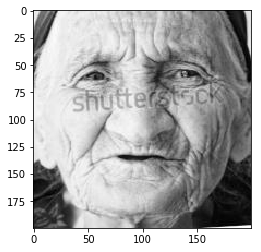

In [4]:
plt.imshow(np.dot(np.array(image_file)[:,:,:3], [0.2989, 0.5870, 0.1140]), cmap='gray')

In [5]:
random.seed(2)

In [6]:
random.shuffle(files) #randomizing the files to sample from it (this is just to save time)

In [7]:
male_faces = pd.DataFrame([])
female_faces = pd.DataFrame([])
m = 0
fe = 0
for f in files:
    if f.split('_')[1] == "0" and m<200: #male
        m += 1
        image_file = Image.open("data/crop_part1/" + f)
        image_file = image_file.resize((32,32), Image.ANTIALIAS)
        img = np.dot(np.array(image_file)[:,:,:3], [0.2989, 0.5870, 0.1140])/255 #convert to gray scale
        face = pd.Series(img.flatten(), name=f)
        male_faces = male_faces.append(face)
    if f.split('_')[1] == "1" and fe<200: #female
        fe += 1
        image_file = Image.open("data/crop_part1/" + f)
        image_file = image_file.resize((32,32), Image.ANTIALIAS)
        img = np.dot(np.array(image_file)[:,:,:3], [0.2989, 0.5870, 0.1140])/255 #convert to gray scale
        face = pd.Series(img.flatten(), name=f)
        female_faces = female_faces.append(face)

In [8]:
male_faces.shape, female_faces.shape

((200, 1024), (200, 1024))

In [9]:
all_faces = pd.concat([male_faces, female_faces], axis=0)
all_faces.shape

(400, 1024)

# Same data as in the paper

Gary B. Huang, Manu Ramesh, Tamara Berg, and Erik Learned-Miller. Labeled faces in the wild: A database for studying face recognition in unconstrained environments. Technical Report 07-49, University of Massachusetts, Amherst, October 2007.

In [2]:
sex = pd.read_csv("data_samsam/data/images/sex.txt").to_dict()["1"] #map from index to sex
imgs = os.listdir("data_samsam/data/images/")[3:-2]

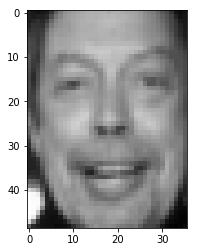

In [3]:
plt.imshow(np.loadtxt("data_samsam/data/images/" + "img0.txt"), cmap='gray')

In [4]:
np.loadtxt("data_samsam/data/images/" + "img1.txt").shape

(49, 36)

In [5]:
imgs[1200][3:-4], sex[int(imgs[0][3:-4])]

('11077', 1)

In [59]:
random.shuffle(imgs)
male_faces = pd.DataFrame([])
female_faces = pd.DataFrame([])
m = 0
fe = 0
t = 0
for f in imgs:
    if t%200 == 0:
        print("Done : ", t)
    t+=1
    if int(f[3:-4]) not in sex:
        continue
    if sex[int(f[3:-4])] == 1:#male
        im = np.loadtxt("data_samsam/data/images/" + f)
        #im = im - np.mean(im)
        male_faces=male_faces.append(pd.Series(im.flatten(), name=f[3:-4]))
        m+=1
    if sex[int(f[3:-4])] == 0:#female
        im = np.loadtxt("data_samsam/data/images/" + f)
        #im = im - np.mean(im)
        female_faces=female_faces.append(pd.Series(im.flatten(), name=f[3:-4]))
        fe+=1

Done :  0
Done :  200
Done :  400
Done :  600
Done :  800
Done :  1000
Done :  1200
Done :  1400
Done :  1600
Done :  1800
Done :  2000
Done :  2200
Done :  2400
Done :  2600
Done :  2800
Done :  3000
Done :  3200
Done :  3400
Done :  3600
Done :  3800
Done :  4000
Done :  4200
Done :  4400
Done :  4600
Done :  4800
Done :  5000
Done :  5200
Done :  5400
Done :  5600
Done :  5800
Done :  6000
Done :  6200
Done :  6400
Done :  6600
Done :  6800
Done :  7000
Done :  7200
Done :  7400
Done :  7600
Done :  7800
Done :  8000
Done :  8200
Done :  8400
Done :  8600
Done :  8800
Done :  9000
Done :  9200
Done :  9400
Done :  9600
Done :  9800
Done :  10000
Done :  10200
Done :  10400
Done :  10600
Done :  10800
Done :  11000
Done :  11200
Done :  11400
Done :  11600
Done :  11800
Done :  12000
Done :  12200
Done :  12400
Done :  12600
Done :  12800
Done :  13000
Done :  13200


In [87]:
all_faces = pd.concat([male_faces, female_faces], axis=0)
all_faces = all_faces/255
all_faces = all_faces #- np.mean(all_faces)
all_faces.shape

(13231, 1764)

In [119]:
A = male_faces.copy()
A = A/255
A = A - np.mean(A, axis=0)
A.shape

(10269, 1764)

In [120]:
B = female_faces.copy()
B = B/255
B = B - np.mean(B, axis=0)
B.shape

(2962, 1764)

In [90]:
M = all_faces - np.mean(all_faces, axis=0)

# Standard PCA

In [64]:
def pca(X, d):
    u, e, v = np.linalg.svd(X)
    U = np.outer(u[:, 0], v[0, :]) * e[0]
    for i in range(1,d):
        U += np.outer(u[:, i], v[i, :]) * e[i]
    return U

In [94]:
projected = pca(M, 20)

In [95]:
projected.shape

(13231, 1764)

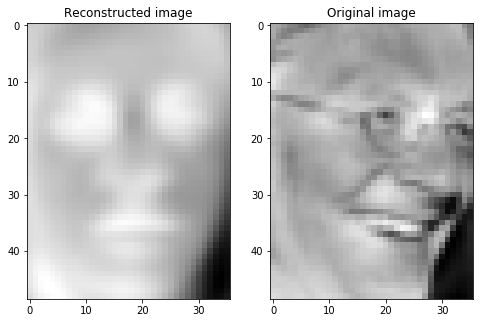

Reconstruction error is :  10.195611304591889


In [96]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,8))
axes[0].imshow(projected[2].reshape(shape), cmap='gray')
axes[0].set_title("Reconstructed image")
axes[1].imshow(np.array(M)[2].reshape(shape), cmap='gray')
axes[1].set_title("Original image")
plt.show()
print("Reconstruction error is : ", np.sum(np.square(np.array(M)[2].reshape(shape) - projected[2].reshape(shape))))

In [97]:
#Computing reconstruction error 
def RE_error(df1, df2):
    arr1 = np.array(df1)
    arr2 = np.array(df2)
    res = []
    for sample in range(arr2.shape[0]):
        res.append(np.linalg.norm(arr1[sample].reshape(shape) - arr2[sample].reshape(shape), ord='fro')**2)
    return np.mean(res)

In [99]:
RE_error(np.array(M), projected)

11.41477790455467

### Bias between males and females in PCA 

Sample 200 men and 200 women 20 times and average RE over these 20 times : 

In [153]:
male_error = {}
female_error = {}
for bt in range(20):
    print("------------")
    print("Sample "+str(bt)+"...")
    sample = pd.concat([male_faces.sample(200), female_faces.sample(200)], axis=0)
    sample = sample/255
    sample = sample - np.mean(sample, axis=0)
    re_male = []
    re_female = []
    dim = [d for d in range(2,21)]
    for d in dim:
        projected = pca(sample, d)
        #computing RE for men with dimensionnality reduction d
        re_male.append(RE_error(sample[:200], projected[:200]))
        #computing RE for women with dimensionnality reduction d
        re_female.append(RE_error(sample[200:], projected[200:]))
    male_error[bt] = re_male
    female_error[bt] = re_female

------------
Sample 0...
------------
Sample 1...
------------
Sample 2...
------------
Sample 3...
------------
Sample 4...
------------
Sample 5...
------------
Sample 6...
------------
Sample 7...
------------
Sample 8...
------------
Sample 9...
------------
Sample 10...
------------
Sample 11...
------------
Sample 12...
------------
Sample 13...
------------
Sample 14...
------------
Sample 15...
------------
Sample 16...
------------
Sample 17...
------------
Sample 18...
------------
Sample 19...


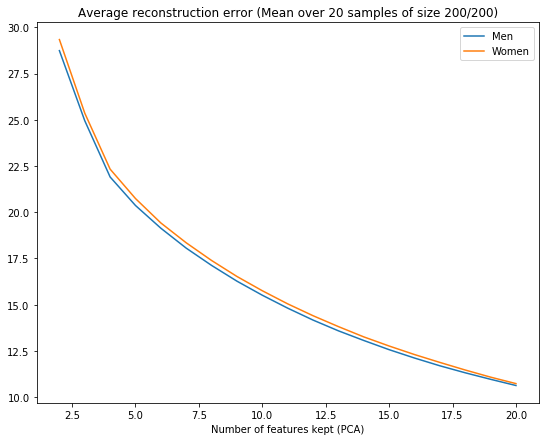

In [161]:
plt.figure(figsize=(9, 7))
plt.plot(dim, np.mean(np.array(list(male_error.values())), axis=0), label="Men")
plt.plot(dim, np.mean(np.array(list(female_error.values())), axis=0), label="Women")
plt.legend()
plt.title("Average reconstruction error (Mean over 20 samples of size 200/200)")
plt.xlabel("Number of features kept (PCA)")
plt.show()

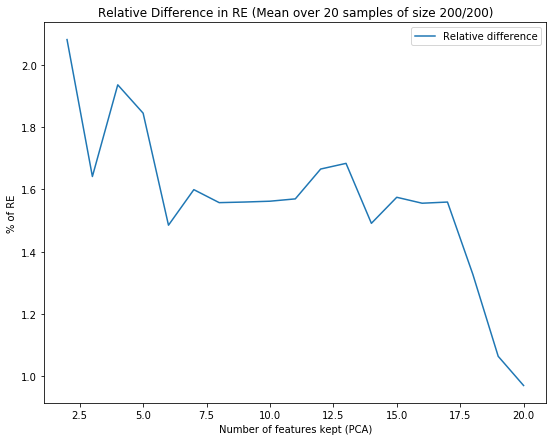

In [170]:
rel_diff = (np.mean(np.array(list(female_error.values())),axis=0)-np.mean(np.array(list(male_error.values())), axis=0))/np.mean(np.array(list(male_error.values())), axis=0)
plt.figure(figsize=(9, 7))
plt.plot(dim, rel_diff*100, label="Relative difference")
plt.legend()
plt.title("Relative Difference in RE (Mean over 20 samples of size 200/200)")
plt.xlabel("Number of features kept (PCA)")
plt.ylabel("% of RE")
plt.show()

# Fair PCA - Implementation

**First implement the Oracle function**

In [112]:
def frob_innerproduct(a, b):
    return np.trace(a.T @ b)

In [126]:
def oracle(p, alpha, beta, A, B):
    """ Oracle fo Fair PCA - Algorithm 2
        -----------
        Parameters :
        p : tuple of size 2 such that each component are positive and sum to 1.
        alpha : float
        beta : float
        A : array of shape (m1, n)
        B : array of shape (m2, n)
        -----------
        Returns : 
        P, z1, z2 such that : 
            
            P, z1, z2 = argmin p1*z1 + p2*z2
            s.t.
                z1 = alpha - 1/m1 <A'A, P>
                z2 = beta - 1/m1 <B'B, P>
                P is a matrix of size nxn such that 0 <= P <= P and Tr(P) <= d.
    """
    
    p1, p2, m1, m2 = p[0], p[1], A.shape[0], B.shape[0]
    mat = p1/m1 * A.T @ A + p2/m2 * B.T @ B
    V = pca(mat, d)
    P = V@V.T
    z1 = alpha - (1/m1) * frob_innerproduct(A.T @ A, P)
    z2 = beta - (1/m2) * frob_innerproduct(B.T @ B, P)
    return P, z1, z2

In [127]:
def MW_PCA(alpha, beta, A, B, eta, T):
    """ Multiplicative weight update for faire PCA - Algorithm 3
        -----------
        Parameters :
        alpha : float
        beta : float
        A : array of shape (m1, n)
        B : array of shape (m2, n)
        eta : float, must be stricly positive
        T : int, must be positive (According to the reference paper, no need for T to be very large : a fews tens)
        -----------
        Returns : 
        P, z such that : 
            
            P, z = argmin z
            s.t.
                z1 >= alpha - 1/m1 <A'A, P>
                z2 >= beta - 1/m2 <B'B, P>
                P is a matrix of size nxn such that 0 <= P <= P and Tr(P) <= d.
    """
    p = [0.5, 0.5] #initialize values for p for the oracle function
    Ps = []
    m1, m2 = A.shape[0], B.shape[0]
    #Looping T times
    for t in range(1, T+1):
        Pt, m1t, m2t = oracle(p, alpha, beta, A, B)
        Ps.append(Pt)
        p_hat1, p_hat2 = p[0] * np.exp(eta*m1), p[1] * np.exp(eta*m2)
        s = p_hat1 + p_hat2
        p = [p_hat1/s, p_hat2/s]
    #return values found
    P = np.mean(Ps, axis=0)
    z = max(alpha - (1/m1) * frob_innerproduct(A.T @ A, P), beta - (1/m2) * frob_innerproduct(B.T @ B, P))
    return P, z

**All steps of algorithm 1 (Fair PCA) are done except step 4 : solving the following linear program** 

We do it now : 

Program :


$\min_{\lambda \in \mathbb{R}^{n}, z \in \mathbb{R}} \; z $

s.t. 

$0 \leq \lambda_i \leq 1$ 


$\sum_{i} \lambda_i \leq d$

$-z - \sum_{i} \lambda_i \cdot <B^{T}B, u_j, u_j^{T}> \; \leq  - \frac{|| \hat{B} ||_F^2}{m2}$


$-z - \sum_{i} \lambda_i \cdot <A^{T}A, u_j, u_j^{T}> \; \leq  - \frac{|| \hat{A} ||_F^2}{m1}$


To solve this linear program we first write it in its canonical form : 



**mettre les formules** 



In [115]:
from cvxopt import matrix, solvers

In [116]:
def rank_approx(M, d):
    """ Low rank approximation of matrices using SVD decomposition
        -----------
        Parameters :
        M : array 
        d : lower dimension wanted
        -----------
        Returns : 
        L, optimal rank d approximation of M.
    """
    M_U, M_eig, M_V = np.linalg.svd(M)
    L = np.outer(M_U[:, 0], M_V[0, :]) * M_eig[0]
    for j in range(1,d):
        L += np.outer(M_U[:, j], M_V[j, :]) * M_eig[j]
    return L

In [117]:
def fair_PCA(A, B, d):
    """ Fair PCA - Algorithm 1
        -----------
        Parameters :
        A : array of shape (m1, n)
        B : array of shape (m2, n)
        d : lower dimension wanted
        -----------
        Returns : 
        U of shape (m, n) st m = m1 + m2 and rank(U) <= d+1
    """
    #step 1 
    m1, m2 = A.shape[1], B.shape[1]
    A_hat = rank_approx(A, d)
    B_hat = rank_approx(B, d)
    print("Step 1 done")
    print("-----------")
    #step 2 
    alpha, beta, eta, T = frob_innerproduct(A_hat, A_hat)/m1, frob_innerproduct(B_hat, B_hat)/m2, 1, 10
    P, z = MW_PCA(alpha, beta, A, B, eta, T)
    print("Step 2 done")
    print("-----------")
    #step 3 
    P_U, P_eig, P_V = np.linalg.svd(P)
    print("Step 3 done")
    print("-----------")
    #step 4 
    #Here we will solve a LP, we first constuct matrices in order to write the LP problem 
    #in a canonical form as explained earlier (so we can use a library to solve it).
    n = A.shape[1]
    #construct a matrix of constraint : 
    A_lp_const = np.pad(np.eye(n), ((1,2), (0,1)), mode='constant', constant_values=((1,0), (0,0)))
    A_lp_const[n+1, n] = -1
    A_lp_const[n+2, n] = -1
    ata = A.T @ A
    btb = B.T @ B
    for j in range(n):
        uut = np.outer(P_U[:, j], P_V[j, :])
        fAj = -frob_innerproduct(ata, uut)/m1
        fBj = -frob_innerproduct(btb, uut)/m2
        A_lp_const[n+1, j] = fAj
        A_lp_const[n+2, j] = fBj
    A_lp_const = np.concatenate((A_lp_const, np.pad(-np.eye(n), ((0,0), (0,1)), mode='constant', constant_values=((0,0), (0,0)))))
    #now construct vector of values (i.e. b ) and coefficients (i.e. c)
    b = np.ones(n+3)
    b[0] = d 
    b[-1] = -frob_innerproduct(B_hat, B_hat)/m2
    b[-2] = -frob_innerproduct(A_hat, A_hat)/m1
    b = np.concatenate((b, np.zeros(n)))
    c = np.zeros(n+1)
    c[-1] = 1
    print("Starting LP solve...")
    #A,b,c must in the "matrix" library format
    coefs = solvers.lp(matrix(list(c)), matrix(A_lp_const), matrix(list(b)),show_progress=False)
    z_opt = np.array(coefs['x'])[-1]
    lambda_bar = np.array(coefs['x'])[:-1]
    print("Step 4 done")
    print("-----------")
    #Step 5 : construct lambda* and P*
    lambda_bar = 1 - np.sqrt(np.maximum(1-lambda_bar,0))
    P_star = np.outer(P_U[:, 0], P_V[0, :]) * lambda_bar[0]
    #faire le warning
    for j in range(1, len(lambda_bar)):
        if lambda_bar[j] > 0.07:
            P_star += np.outer(P_U[:, j], P_V[j, :]) * lambda_bar[j]
    print("Step 5 done")
    print("-----------")
    #Finally construct U (pca matrix)
    U = np.concatenate((A, B)) @ P_star
    return U

In [121]:
A_test = A.sample(500)
B_test = B.sample(500)

In [128]:
U = fair_PCA(A_test, B_test, 20)

Step 1 done
-----------
Step 2 done
-----------
Step 3 done
-----------
Starting LP solve...
     pcost       dcost       gap    pres   dres   k/t
 0:  9.6864e+00 -4.6115e+03  2e+04  2e+00  1e+02  1e+00
 1:  3.6397e+00 -8.1872e+02  2e+03  4e-01  2e+01  3e+00
 2:  3.9590e+00 -1.2904e+02  2e+02  7e-02  3e+00  6e-01
 3:  3.3847e+00 -9.0596e+01  2e+02  5e-02  2e+00  4e-01
 4:  3.1985e+00 -1.1771e+01  2e+01  8e-03  4e-01  2e-02
 5:  2.8795e+00 -1.1955e+01  2e+01  8e-03  4e-01  2e-02
 6:  2.4890e+00 -1.1354e+01  2e+01  7e-03  3e-01  2e-02
 7:  2.7914e+00 -1.0438e+01  2e+01  7e-03  3e-01  1e-02
 8:  2.5369e+00 -1.0328e+01  2e+01  7e-03  3e-01  1e-02
 9:  2.4024e+00 -9.4877e+00  1e+01  6e-03  3e-01  1e-02
10:  1.9566e+00 -7.5658e+00  1e+01  5e-03  2e-01  8e-03
11:  2.0118e+00 -7.2968e+00  1e+01  5e-03  2e-01  7e-03
12:  1.8762e+00 -6.2647e+00  1e+01  4e-03  2e-01  6e-03
13:  1.5832e+00 -6.3111e+00  9e+00  4e-03  2e-01  5e-03
14:  1.5048e+00 -6.2230e+00  9e+00  4e-03  2e-01  5e-03
15:  1.5942e+

In [129]:
U.shape

(1000, 1764)

In [130]:
np.linalg.matrix_rank(U) #the matrix we got is indeed of rank d = 20 (or d+1)

20

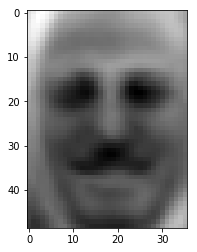

In [131]:
plt.imshow(U[0, :].reshape(shape), cmap='gray')

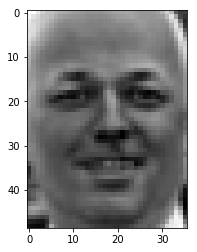

In [133]:
plt.imshow(np.array(A_test)[0, :].reshape(shape), cmap='gray')

In [136]:
print("After fair PCA, RE on Male :", RE_error(A_test, U[:500]), "|| Female : ", RE_error(B_test, U[500:]))

After fair PCA, RE on Male : 11.262929295628938 || Female :  11.259317480934595


On peut résoudre le LP avec scipy... c'est pareil

In [66]:
from scipy.optimize import linprog

In [116]:
Alp = A_lp_const.copy()
Alp = np.concatenate((Alp[0, :, None], Alp[1025, :, None], Alp[1026, :, None]), axis=1).T

In [124]:
blp = b.copy()
blp = np.array([blp[0],
blp[1025],
blp[1026]])

array([ 20.        , -65.06107156, -62.52720432])

In [125]:
bounds = []
for k in range(1024):
    bounds.append((0,1))
bounds.append((-np.inf, np.inf))

In [126]:
coefs = linprog(c, A_ub=Alp, b_ub=blp, A_eq=None, b_eq=None, bounds=bounds)

In [127]:
coefs

     con: array([], dtype=float64)
     fun: -4318.618428839305
 message: 'Optimization terminated successfully.'
     nit: 14
   slack: array([-3.81472496e-05,  3.00161703e+02, -2.23724020e-04])
  status: 0
 success: True
       x: array([ 1.04070850e-09,  2.16428153e-09,  2.95464957e-09, ...,
        1.25671377e-08,  1.99935945e-08, -4.31861843e+03])